In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# import tensorflow as tf
from sklearn import datasets

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# # lê-se o dataset expandido (TENSORFLOW)
# mnist = tf.keras.datasets.mnist
# (X_train, y_train),(X_test, y_test) = mnist.load_data()

# def reshape(data):
#     nsamples, nx, ny = data.shape
#     return data.reshape((nsamples,nx*ny))

# # transforma-se as matrizes em vetores
# X_train = reshape(X_train)
# X_test = reshape(X_test)

# X = np.concatenate((X_train, X_test), axis=0)
# y = np.concatenate((y_train, y_test), axis=0)

# lê-se o dataset 
X,y = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [2]:
folds = 10
scores = np.array([])

kf = KFold(n_splits=folds)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index].astype('float32'), X[test_index].astype('float32')
    y_train, y_test = y[train_index].astype('float32'), y[test_index].astype('float32')
    
    # PCA
    pca = PCA(0.99)
    pca.fit(X_train)

    # aplica-se a PCA buscando manter uma parte da variância de forma a diminuir o número de compononentes
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    # k-means
    n_clusters = 20
    clustered_X_train = np.empty((0, X_train.shape[1]))
    clustered_y_train = np.array([])
    for label in set(y):
        kmeans = KMeans(n_clusters=n_clusters).fit(X_train[np.where(y_train == label)])
        clustered_X_train = np.append(clustered_X_train, kmeans.cluster_centers_, axis=0)
        clustered_y_train = np.append(clustered_y_train, label*np.ones(n_clusters))
    
    # SVM
    clf = svm.SVC(gamma=0.0005)
    clf.fit(clustered_X_train, clustered_y_train)
    scores = np.append(scores, clf.score(X_test, y_test))

print(f'{np.mean(scores)} +- {np.std(scores)}')

0.9687936507936508 +- 0.03880763782868365


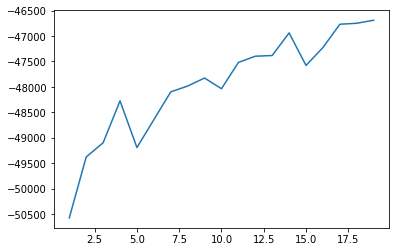

In [3]:
clusters = np.array(range(1, 20))
scores = np.array([])

# Find optimal number of clusters
for c in clusters:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
    kmeans = KMeans(n_clusters=c).fit(X_train[np.where(y_train == 0)])
    scores = np.append(scores, kmeans.score(X_test[np.where(y_train == 0)]))

plt.plot(clusters, scores)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA
pca = PCA(0.99)
pca.fit(X_train)

# aplica-se a PCA buscando manter uma parte da variância de forma a diminuir o número de compononentes
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# k-means
n_clusters = 20
clustered_X_train = np.empty((0, X_train.shape[1]))
clustered_y_train = np.array([])
for label in set(y):
    kmeans = KMeans(n_clusters=n_clusters).fit(X_train[np.where(y_train == label)])
    clustered_X_train = np.append(clustered_X_train, kmeans.cluster_centers_, axis=0)
    clustered_y_train = np.append(clustered_y_train, label*np.ones(n_clusters))

# SVM
clf = svm.SVC(gamma=0.0005)
clf.fit(clustered_X_train, clustered_y_train)
print(clf.score(X_test, y_test))

0.9805555555555555


In [5]:
kf = KFold(n_splits=folds)
scores = np.array([])
X, y = datasets.load_digits(return_X_y=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index].astype('float32'), X[test_index].astype('float32')
    y_train, y_test = y[train_index].astype('float32'), y[test_index].astype('float32')
    clf = svm.SVC(gamma=0.0005)
    clf.fit(X_train, y_train)
    scores = np.append(scores, clf.score(X_test, y_test))

print(f'{np.mean(scores)} +- {np.std(scores)}')
print(scores)

0.9883174603174603 +- 0.021593159802691008
[0.97222222 0.94444444 1.         0.97222222 1.         1.
 1.         1.         1.         1.         1.         0.97222222
 1.         0.97222222 1.         0.97222222 1.         1.
 1.         1.         1.         1.         0.97222222 1.
 1.         0.97222222 1.         1.         1.         1.
 1.         0.94444444 1.         1.         1.         1.
 1.         0.97222222 1.         1.         0.97222222 1.
 1.         0.94444444 0.97222222 1.         0.88888889 1.
 0.97142857 1.        ]


In [6]:
%%timeit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(gamma=0.0005)
clf.fit(X_train, y_train)

86 ms ± 401 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
